<a href="https://colab.research.google.com/github/RobertSparadrap/neronal_network/blob/main/neuronal_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [118]:
train = datasets.MNIST("./datasets", download=True, train=True)
test = datasets.MNIST("./datasets", download=True, train=False)

In [119]:
train[0][0]

In [120]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5]), transforms.Lambda(lambda x: x.double())])

train = datasets.MNIST("./datasets", download=True, train=True, transform=transform)
test = datasets.MNIST("./datasets", download=True, train=False, transform=transform)

In [121]:
train[0][0]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [122]:
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

In [123]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [124]:
images.squeeze().shape

torch.Size([64, 28, 28])

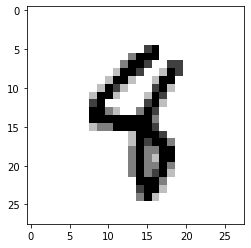

In [125]:
plt.imshow(images[0].squeeze(), cmap="gray_r")

In [126]:
def show_images(images, labels, rows=6, cols=10):
  fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
  for i in range(cols*rows):
    ridx = i // cols
    cidx = i % cols
    ax = axes[ridx, cidx]
    ax.axis("off")
    ax.imshow(images[i].squeeze(), cmap="gray_r")
    ax.set_title("{}" .format(labels[i]))
  plt.show()
  return fig

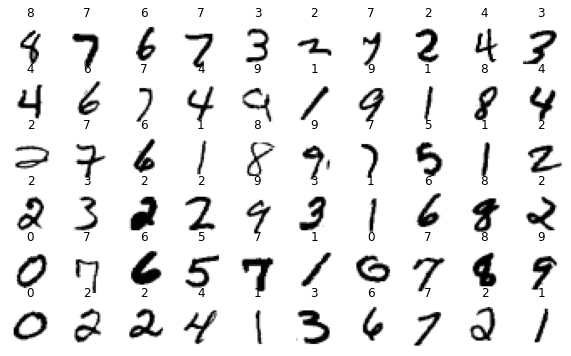

In [127]:
fig = show_images(images, labels)

In [128]:
def convert_to_vector(labels):
  new_labels = []
  for label in labels:
    x = np.zeros(10)
    x[label] = 1.
    new_labels.append(x)
  new_labels = torch.from_numpy(np.vstack(new_labels))
  return new_labels

In [129]:
print(labels[0])
labels = convert_to_vector(labels)
print(labels[0])

tensor(8)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=torch.float64)


In [130]:
import torch.nn as nn

INPUT_SIZE = 28*28
HIDDEN1_SIZE = 128
HIDDEN2_SIZE = 64
OUTPUT_SIZE = 10

class DigiNet(nn.Module):
  def __init__(self):
    super(DigiNet, self).__init__()
    self.input_layer_weights = nn.Linear(INPUT_SIZE, HIDDEN1_SIZE)
    self.hidden_layer1_weights = nn.Linear(HIDDEN1_SIZE, HIDDEN2_SIZE)
    self.hidden_layer2_weights = nn.Linear(HIDDEN2_SIZE, OUTPUT_SIZE)
 
    self.act1 = nn.ReLU()
    self.act2 = nn.ReLU()
    self.act3 = nn.Softmax(dim=1)

    self.double()

  def forward(self, x):
    x = self.input_layer_weights(x)
    x = self.act1(x)
    x = self.hidden_layer1_weights(x)
    x = self.act2(x)
    x = self.hidden_layer2_weights(x)
    x = self.act3(x)
    return x

In [131]:
model = DigiNet()
images = images.view(images.shape[0], -1)

In [132]:
prediction = model(images)

In [134]:
print("Label:", labels[0])
n = 0
for i in prediction[0]:
  print(n, "=", i.tolist()*100, "%")
  n += 1

Label: tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=torch.float64)
0 = 9.584930334702822 %
1 = 8.722654289961005 %
2 = 10.302666651860028 %
3 = 10.969870516426528 %
4 = 11.0446088386914 %
5 = 11.351745039125866 %
6 = 9.017293440590452 %
7 = 9.196215592486222 %
8 = 10.21747686695095 %
9 = 9.592538429204739 %


In [135]:
mse = nn.MSELoss()
print(prediction.shape)
print(labels.shape)
loss =mse(prediction, labels)
print(loss)

torch.Size([64, 10])
torch.Size([64, 10])
tensor(0.0902, dtype=torch.float64, grad_fn=<MseLossBackward0>)


In [136]:
weights = model.parameters()
print(list(weights))

[Parameter containing:
tensor([[-0.0106,  0.0330,  0.0356,  ..., -0.0347, -0.0109,  0.0254],
        [ 0.0219,  0.0313, -0.0292,  ..., -0.0103,  0.0023,  0.0195],
        [-0.0249, -0.0156, -0.0190,  ..., -0.0026, -0.0231, -0.0255],
        ...,
        [-0.0263,  0.0269,  0.0153,  ..., -0.0192,  0.0026,  0.0109],
        [-0.0213, -0.0069, -0.0144,  ...,  0.0312, -0.0097, -0.0191],
        [ 0.0023,  0.0304, -0.0106,  ...,  0.0241, -0.0355,  0.0262]],
       dtype=torch.float64, requires_grad=True), Parameter containing:
tensor([-0.0006,  0.0108, -0.0107,  0.0065,  0.0296, -0.0293,  0.0067, -0.0206,
        -0.0017, -0.0184, -0.0045,  0.0267,  0.0001,  0.0246,  0.0224,  0.0234,
        -0.0138,  0.0035, -0.0239, -0.0308,  0.0275,  0.0294, -0.0217,  0.0012,
         0.0316, -0.0174,  0.0254,  0.0077, -0.0042,  0.0251,  0.0258,  0.0110,
         0.0004,  0.0113, -0.0357, -0.0034,  0.0285,  0.0153,  0.0041, -0.0344,
        -0.0248,  0.0159,  0.0028,  0.0177,  0.0187,  0.0112, -0.0157,  

In [137]:
loss.backward()

In [142]:
from torch import optim

def train_model(model, epochs=15, lr=0.0035, momentum=0.7):
  sgd = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
  mse = nn.MSELoss()
  for epoch in range(epochs):
    _loss = 0
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)
      sgd.zero_grad()
      preds = model(images)
      labels = convert_to_vector(labels)
      loss = mse(preds, labels)
      loss.backward()
      sgd.step()
      _loss += loss.item()
    else:
      print("epoch {} - training loss: {}" .format(epoch, _loss/len(trainloader)))
  return model

In [143]:
model = train_model(model)

epoch 0 - training loss: 0.08966371363828664
epoch 1 - training loss: 0.08871112653755568
epoch 2 - training loss: 0.08751422562356256
epoch 3 - training loss: 0.08561550751758976
epoch 4 - training loss: 0.08246293824864025
epoch 5 - training loss: 0.07758502178975431
epoch 6 - training loss: 0.07092404717031923
epoch 7 - training loss: 0.06345243897229735
epoch 8 - training loss: 0.056266109440401856
epoch 9 - training loss: 0.04987740311286516
epoch 10 - training loss: 0.044157215071301416
epoch 11 - training loss: 0.038998735202841084
epoch 12 - training loss: 0.03458412752825714
epoch 13 - training loss: 0.031019159204045865
epoch 14 - training loss: 0.02821959741818546
